## Image generation for WR-140

Credit: [WR-DustERS](https://www.stsci.edu/jwst/science-execution/approved-programs/dd-ers/program-1349), ERS 1349, PI - R. Lau

This notebook takes input from the JWST MIRI instriment and uses `astropy.visualization` to render an image of the WR-140 binary showing generated dust rings. For more details see:
 - DustERS team site https://www.ir.isas.jaxa.jp/~ryanlau/WRDustERS/index.html
 - Nature publication https://www.nature.com/natastron/volumes/6/issues/11

In [23]:
import sys
!{sys.executable} -m pip install astropy reproject matplotlib
import astropy
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import numpy as np
from astropy.visualization import make_lupton_rgb
%matplotlib inline
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [24]:
#Testing False color image maker

WR140_F21 = fits.open('/workspaces/dusters-wr-140/Lauetal2022_MIRI_Imager_Data/miri_f2100w_WR140_2022.fits')
WR140_F15 = fits.open('/workspaces/dusters-wr-140/Lauetal2022_MIRI_Imager_Data/miri_f1500w_WR140_2022.fits')
WR140_F7 = fits.open('/workspaces/dusters-wr-140/Lauetal2022_MIRI_Imager_Data/miri_f770w_WR140_2022.fits')



WR140data_r = WR140_F21[1].data
WR140data_g = WR140_F15[1].data
WR140data_b = WR140_F7[1].data


_,med_r,std_r = sigma_clipped_stats(WR140data_r, mask_value = 0.0)
_,med_g,std_g = sigma_clipped_stats(WR140data_g, mask_value = 1500.0)
_,med_b,std_b = sigma_clipped_stats(WR140data_b, mask_value = -500.0)

#Optimal WCS Coords
wcsWR140Im,_ = find_optimal_celestial_wcs([WR140_F7[1]])

WR140data_r = reproject_interp(WR140_F21[1], wcsWR140Im,shape_out = np.shape(WR140data_r))[0]
WR140data_g = reproject_interp(WR140_F15[1], wcsWR140Im,shape_out = np.shape(WR140data_g))[0]
WR140data_b = reproject_interp(WR140_F7[1], wcsWR140Im,shape_out = np.shape(WR140data_b))[0]



Set DATE-AVG to '2022-07-27T15:57:56.109' from MJD-AVG.
Set DATE-END to '2022-07-27T16:18:02.560' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.876625 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712734845.462 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-27T17:23:24.274' from MJD-AVG.
Set DATE-END to '2022-07-27T17:43:00.475' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.859080 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712554665.175 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-27T16:41:13.370' from MJD-AVG.
Set DATE-END to '2022-07-27T17:00:32.894' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.872555 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712692972.780 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-07-27T15:57:56.109' from MJD-AVG.
Set DATE-END to '2022-07-27T16:18:02.560' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.876625 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712734845.462 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


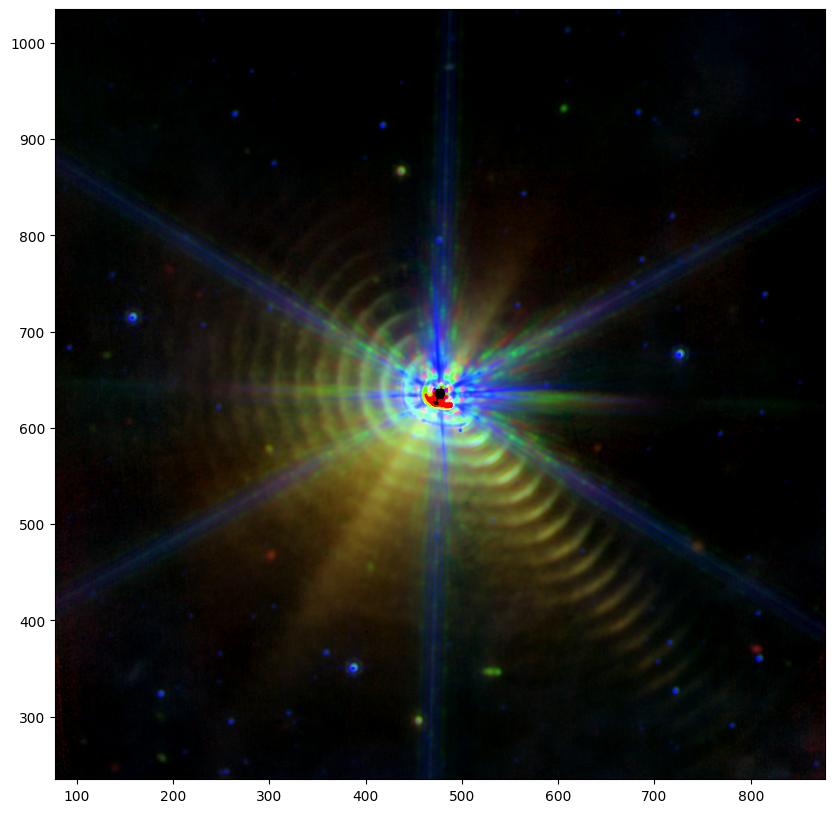

In [25]:
image_r = WR140data_r - med_r
image_g = WR140data_g - med_g
image_b = WR140data_b - med_b
#Nan to 0
image_r[np.isnan(image_r)] = 0
image_g[np.isnan(image_g)] = 0
image_b[np.isnan(image_b)] = 0
#Get rid of negative values?
image_r[image_r<0] = 0
image_g[image_g<0] = 0
image_b[image_b<0] = 0

tlsize = 20
alsize = 20


image = make_lupton_rgb(image_r, image_g, image_b, stretch=8.,minimum = 0.)

#image = make_lupton_rgb(F21_dec, F15_dec*0.8, F7_dec, stretch=10.,minimum = 0.)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
WRplot = ax.imshow(image, origin = 'lower')

cx = 477
cy = 635
bdelt = 400
bdelt2 = 400



x1, x2, y1, y2 = cx-bdelt, cx+bdelt, cy-bdelt2,cy+bdelt2
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

plt.show()